# 第5章 制作镜像

在之前的章节中，我们谈到了如何使用docker export和docker import命令来导出和导入容器，也介绍了如何使用docker commit命令来创建容器的提交，而且这两种方式都能持久化我们对容器的修改。在实际工作中，我们不但要对容器的状态进行保存，还需要把导出的容器状态或创建的容器提交共享给其他机器。我们可以通过直接传输导出的容器和提交生成的镜像来完成这个过程，但若遇到结构较为复杂、体积空间比较庞大的导出数据或镜像时，直接传输往往会产生很多意想不到的问题。

为了简化制造镜像的过程,方便在多台主机上共享镜像，Docker提供了一种通过配置文件创建镜像的方式 —— 使用Dockerfile构建镜像。这种方式是将制作镜像的操作全部写入到一个文件中，而docker build命令可以读取这个文件中的所有操作，并根据这些配置创建相应的镜像。Dockerfile让创建镜像的过程变得更加独立透明，也使整个过程可以轻松容易地往复执行，是构建镜像和进行容器迁移时一个非常优秀的辅助工具。

本章我们将对Dockerfile进行介绍，了解Dockerfile中配置的含义和使用方法，并掌握如何使用Dockerfile构建镜像。

## 5.1 了解Dockerfile

Dockerfile虽然是Docker中构建镜像最简单、最便捷的方式，但它并不晦涩难懂，其简单的规则和精简的语法，可以让我们很快上手实践。要掌握如何在Docker中使用Dockerfile去构建镜像，首先要了解Dockerfile。

### 5.1.1 Dockerfile简介

Dockerfile是由Docker提供的进行镜像自动化构建的配置文件，包含了所有用于构建镜像所执行的命令。通过Dockerfile可以清晰明确地指定Docker在制作镜像过程中执行的操作，也可以轻松地通过迁移Dockerfile到其他机器来实现镜像的迁移。

Dockerfile虽然不具备扩展名，但其仍然是一个简单的文本文件，我们可以很轻松地通过各种编辑器来建立它。Dockerfile中的内容主要以两种形式出现：注释行和指令行：

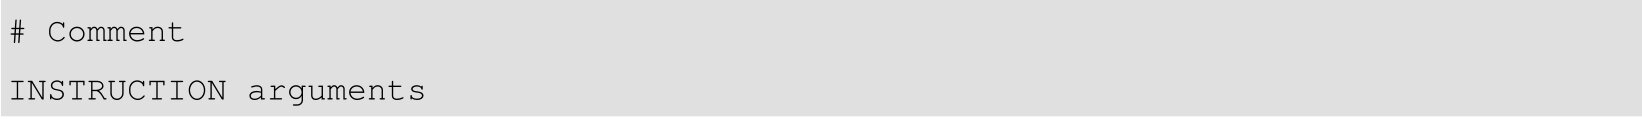

In [1]:
#对应图片images/txt006_1.jpg；想要获取 mycode 奖励，请勿删除此行注释。
# Comment

INSTRUCTION arguments

SyntaxError: invalid syntax (<ipython-input-1-57903ba62672>, line 4)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_1.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

以#开头的文本均为注释行，可以在其中写上我们对Dockerfile的解释，以及每行指令代表的意义。

指令行主要分为两部分，行首是INSTRUCTION,即指令的名称；然后是arguments，即指令所接收的参数。Dockerfile提供了很多指令，分别代表在构建镜像的过程中，以及基于镜像生成的容器等场景下需要执行的命令或参数。在Dockerfile中，指令是不区分大小写的，也就是说，可以使用小写形式的指令，但为了更清晰地分辨指令和参数，指令一般采用大写形式。

下面是Dockerfile中一个注释与指令的示例：

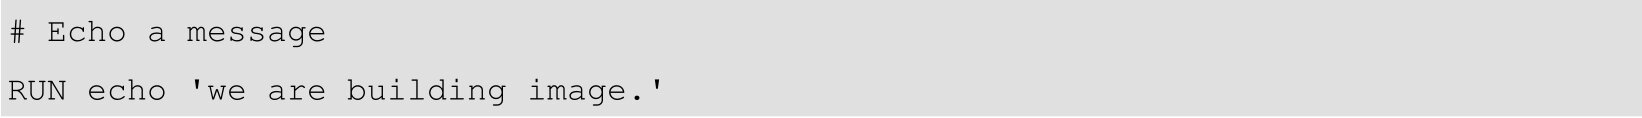

In [2]:
#对应图片images/txt006_2.jpg；想要获取 mycode 奖励，请勿删除此行注释。
# Echo a message

RUN echo 'we are building image.'

SyntaxError: invalid syntax (<ipython-input-2-c3b314ac5696>, line 4)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_2.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

需要注意的是，在Dockerfile中，并非所有以#开头的行都是注释行，有一类特殊的参数是通过以#开头的行来指定的，这类行的基本形式是：

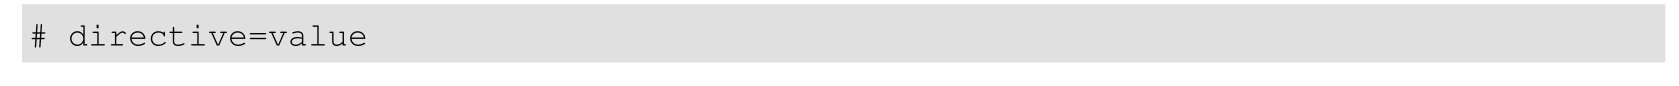



In [3]:
#对应图片images/txt006_3.jpg；想要获取 mycode 奖励，请勿删除此行注释。
# directive=value

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_3.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

此类行称为解析指令行（Parser Directives），它的主要作用是提供一些解析Dockerfile需要使用的参数。解析指令行一般情况下很少被用到，但在某些场合它也能发挥应有的作用。

下面是一个简单的Redis镜像的Dockerfile：

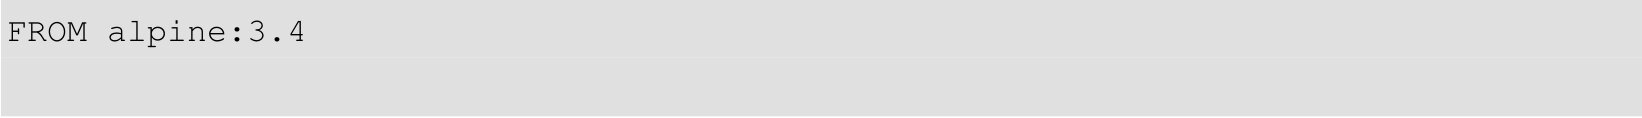

In [4]:
#对应图片images/txt006_4.jpg；想要获取 mycode 奖励，请勿删除此行注释。
FROM alpine:3.4

SyntaxError: invalid syntax (<ipython-input-4-11846b8aa45a>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_4.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

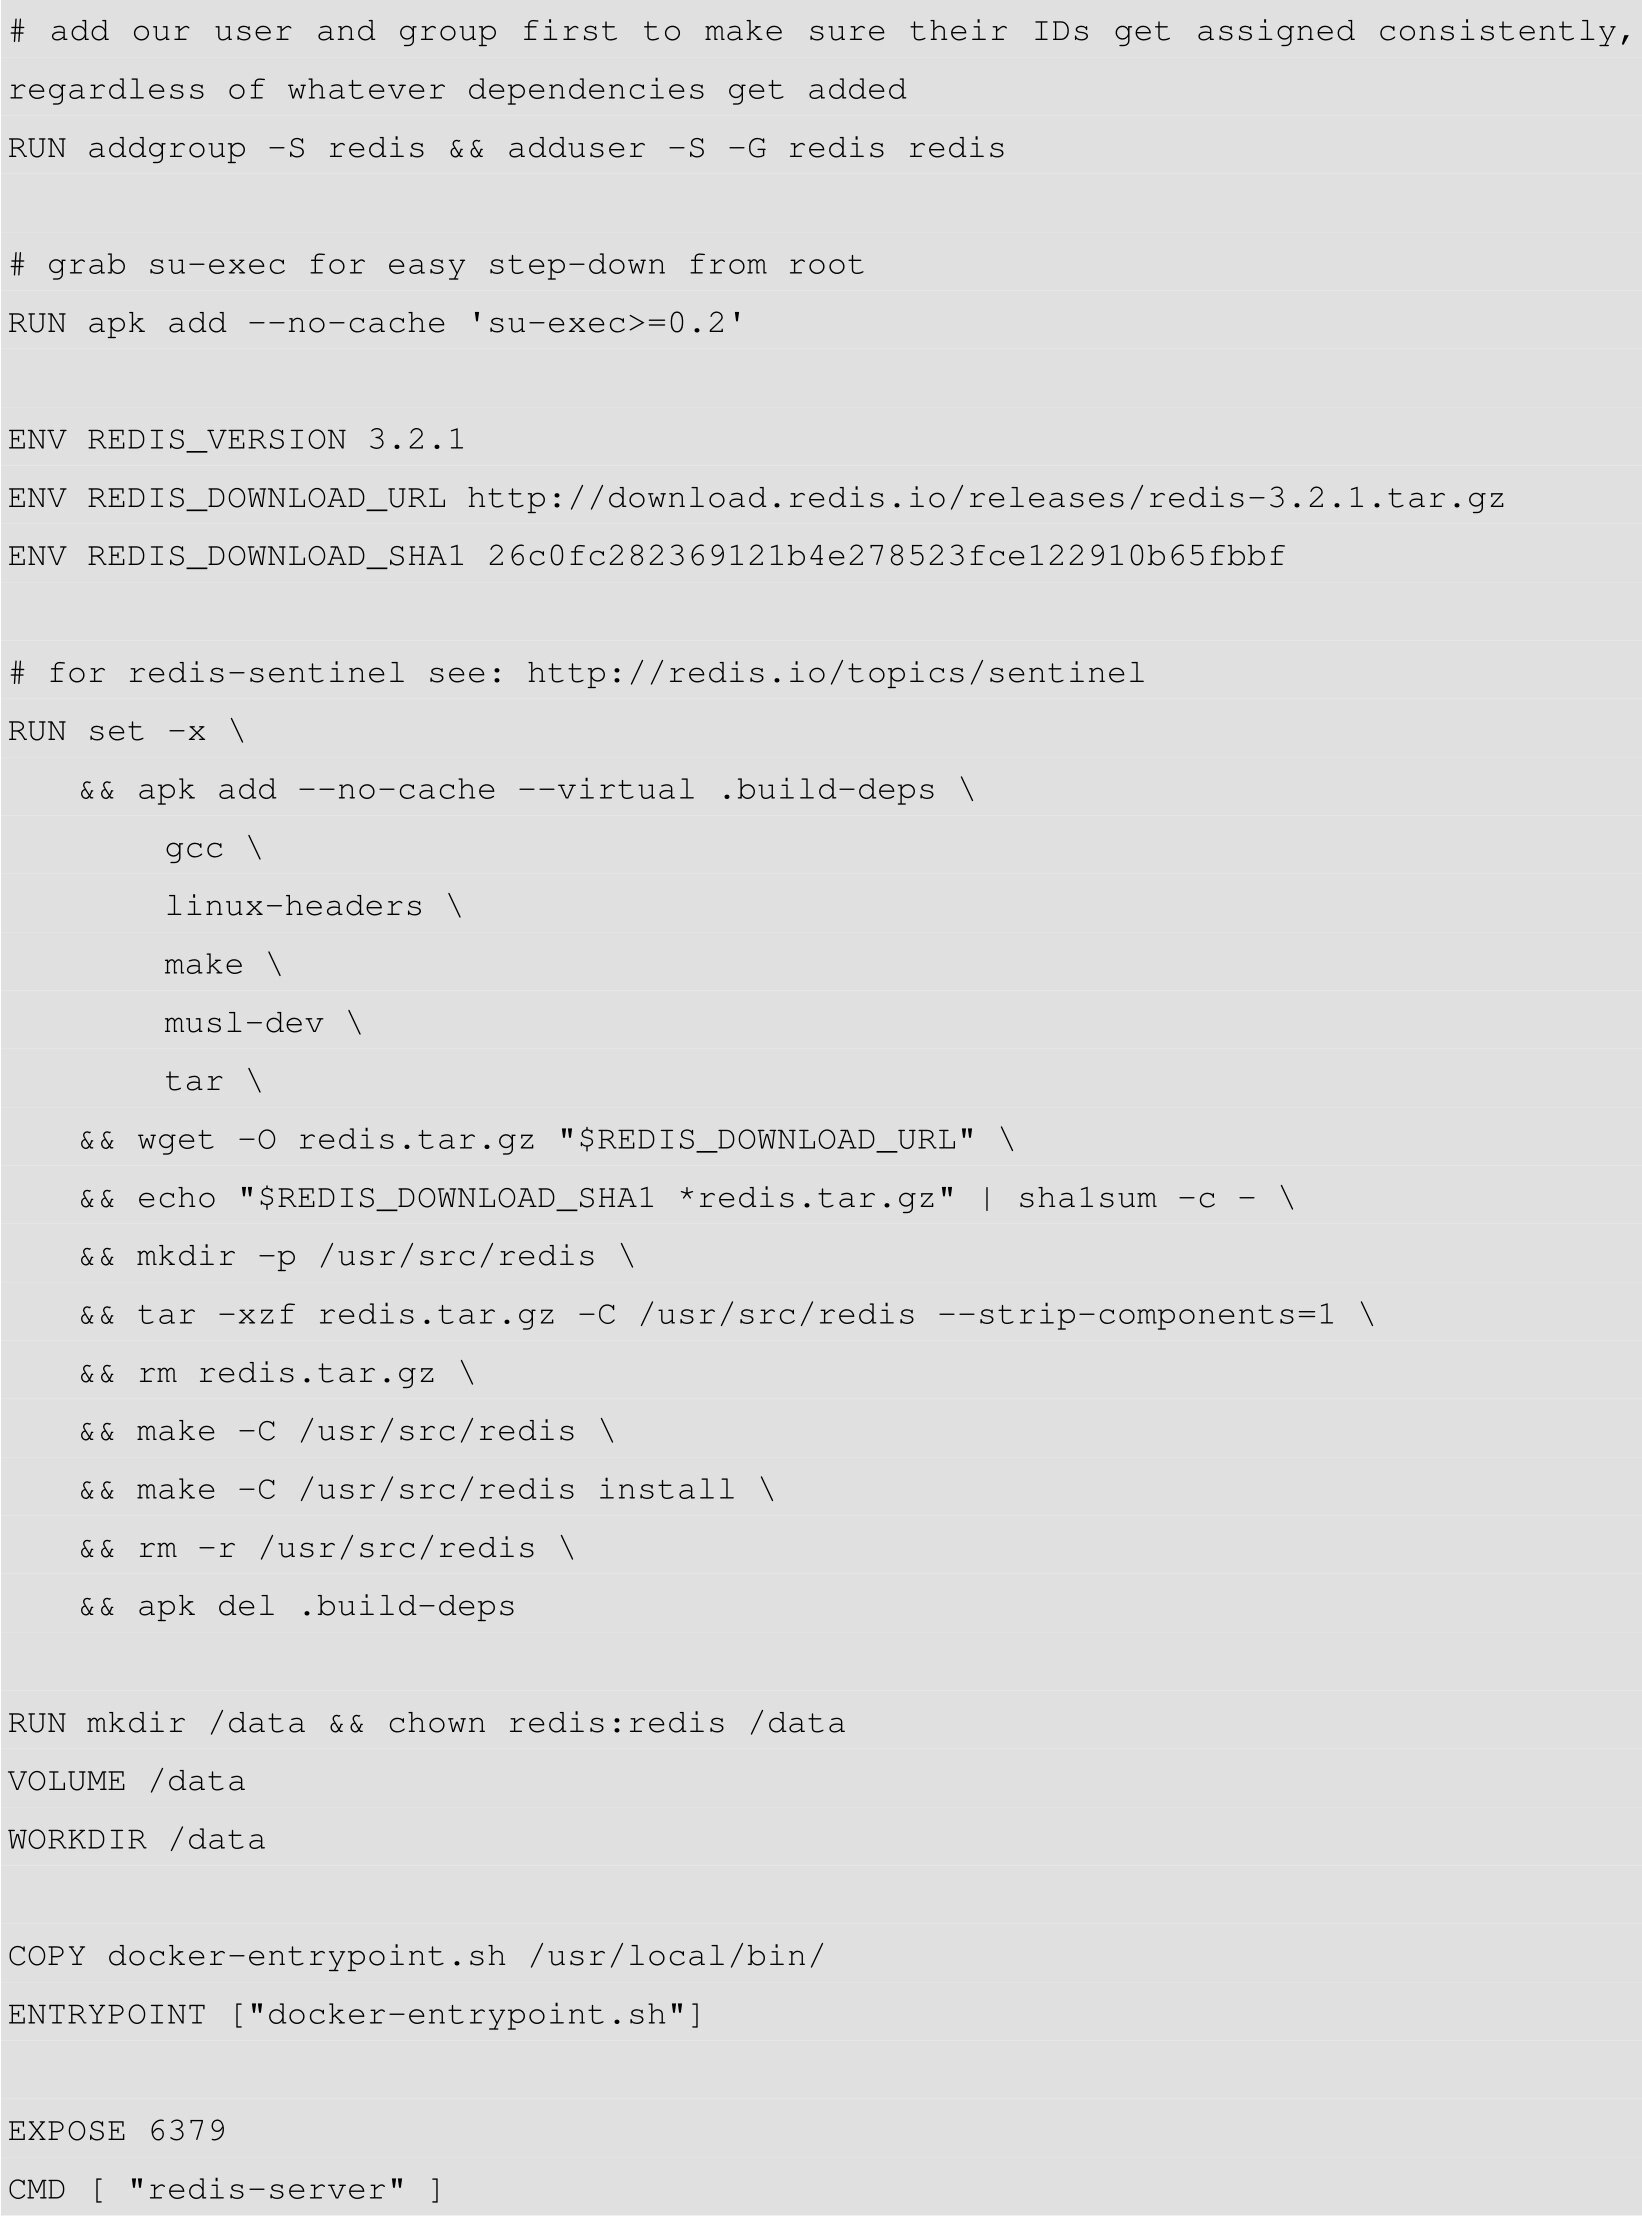

In [5]:
#对应图片images/txt006_5.jpg；想要获取 mycode 奖励，请勿删除此行注释。
# add our user and group first to make sure their IDs get assigned consistently,
regardless of whatever dependencies get added

RUN addgroup -S redis && adduser -S -G redis redis

# grab su-exec for easy step-down from root

RUN apk add --no-cache 'su-exec>=0.2'

ENV REDIS_VERSION 3.2.1
ENV REDIS_DOWNLOAD_URL http://download.redis.io/releases/redis—3.2.1.tar.gz
ENV REDIS_DOWNLOAD_SHA1 26c0£c282369121b4e278523fcel22910b65fbbf

# for redis-sentinel see: http://redis.io/topics/sentinel
RUN set -x \
&& apk add --no-cache --virtual .build-deps \
gcc \
linux-headers \
make \
musl-dev \
(ic cram
&& wget -O redis.tar.gz "SREDIS_DOWNLOAD_URL" \
&& echo "SREDIS_DOWNLOAD_SHA1 *redis.tar.gz" | shalsum -c —- \
&& mkdir -p /usr/src/redis \
&& tar -xzf redis.tar.gz -C /usr/src/redis --strip-components=1 \
&& rm redis.tar.gz \
&& make -C /usr/src/redis \
&& make -C /usr/src/redis install \
&& rm -r /usr/src/redis \

&& apk del .build-deps

RUN mkdir /data && chown redis:redis /data
VOLUME /data
WORKDIR /data

COPY docker-entrypoint.sh /usr/local/bin/

ENTRYPOINT ["docker-entrypoint.sh"]

EXPOSE 6379

CMD [ "redis-server" ]

SyntaxError: invalid syntax (<ipython-input-5-987a9ca67cec>, line 3)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_5.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

在这个例子中，第一条指令FROM alpine:3.4中的FROM指令即我们所要构建的镜像所基于的镜像，通常情况下我们会选择一个系统镜像来布置完整的应用，当然也可以通过基于其他已完成的应用镜像。在接下来的行中，有很多对Linux命令行的操作，这就是我们指定的在构建镜像时所执行的操作。另外，还有工作目录、设置端口号等指令，这些指令都与我们即将构建的镜像，以及基于这个镜像所运行的容器有着密切的关系。



### 5.1.2 使用Dockerfile创建镜像

了解了Dockerfile的基本知识之后，要如何通过Dockerfile来构建Docker镜像呢？Docker CLI为我们提供了docker build命令，通过这个命令，我们可以很轻松地按照Dockerfile约定的流程构建对应的镜像。

这里我们尝试通过之前提到的Redis的Dockerfile来构建一个Redis镜像：

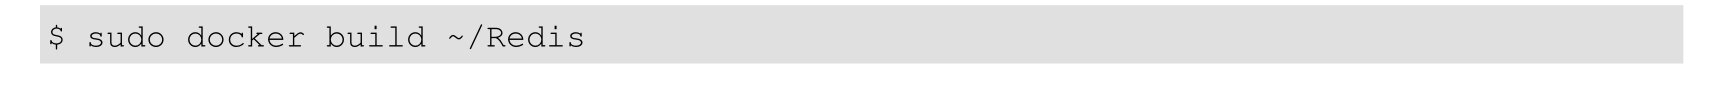



In [6]:
#对应图片images/txt006_6.jpg；想要获取 mycode 奖励，请勿删除此行注释。
§ sudo docker build ~/Redis

SyntaxError: invalid character in identifier (<ipython-input-6-34b4c3071aed>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_6.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

需要注意的是，在docker build命令接收的参数中，提供给docker build命令的应该是Dockerfile所在的目录，而非Dockerfile文件本身的路径。docker build命令会自动找到给出的目录下的Dockerfile文件，并使用它来生成镜像。如果我们存放Dockerfile指令的文件名称并不是Dockerfile，可以通过携带-f参数指定要采用的文件名。

整个构建镜像的过程都会输出到屏幕中：

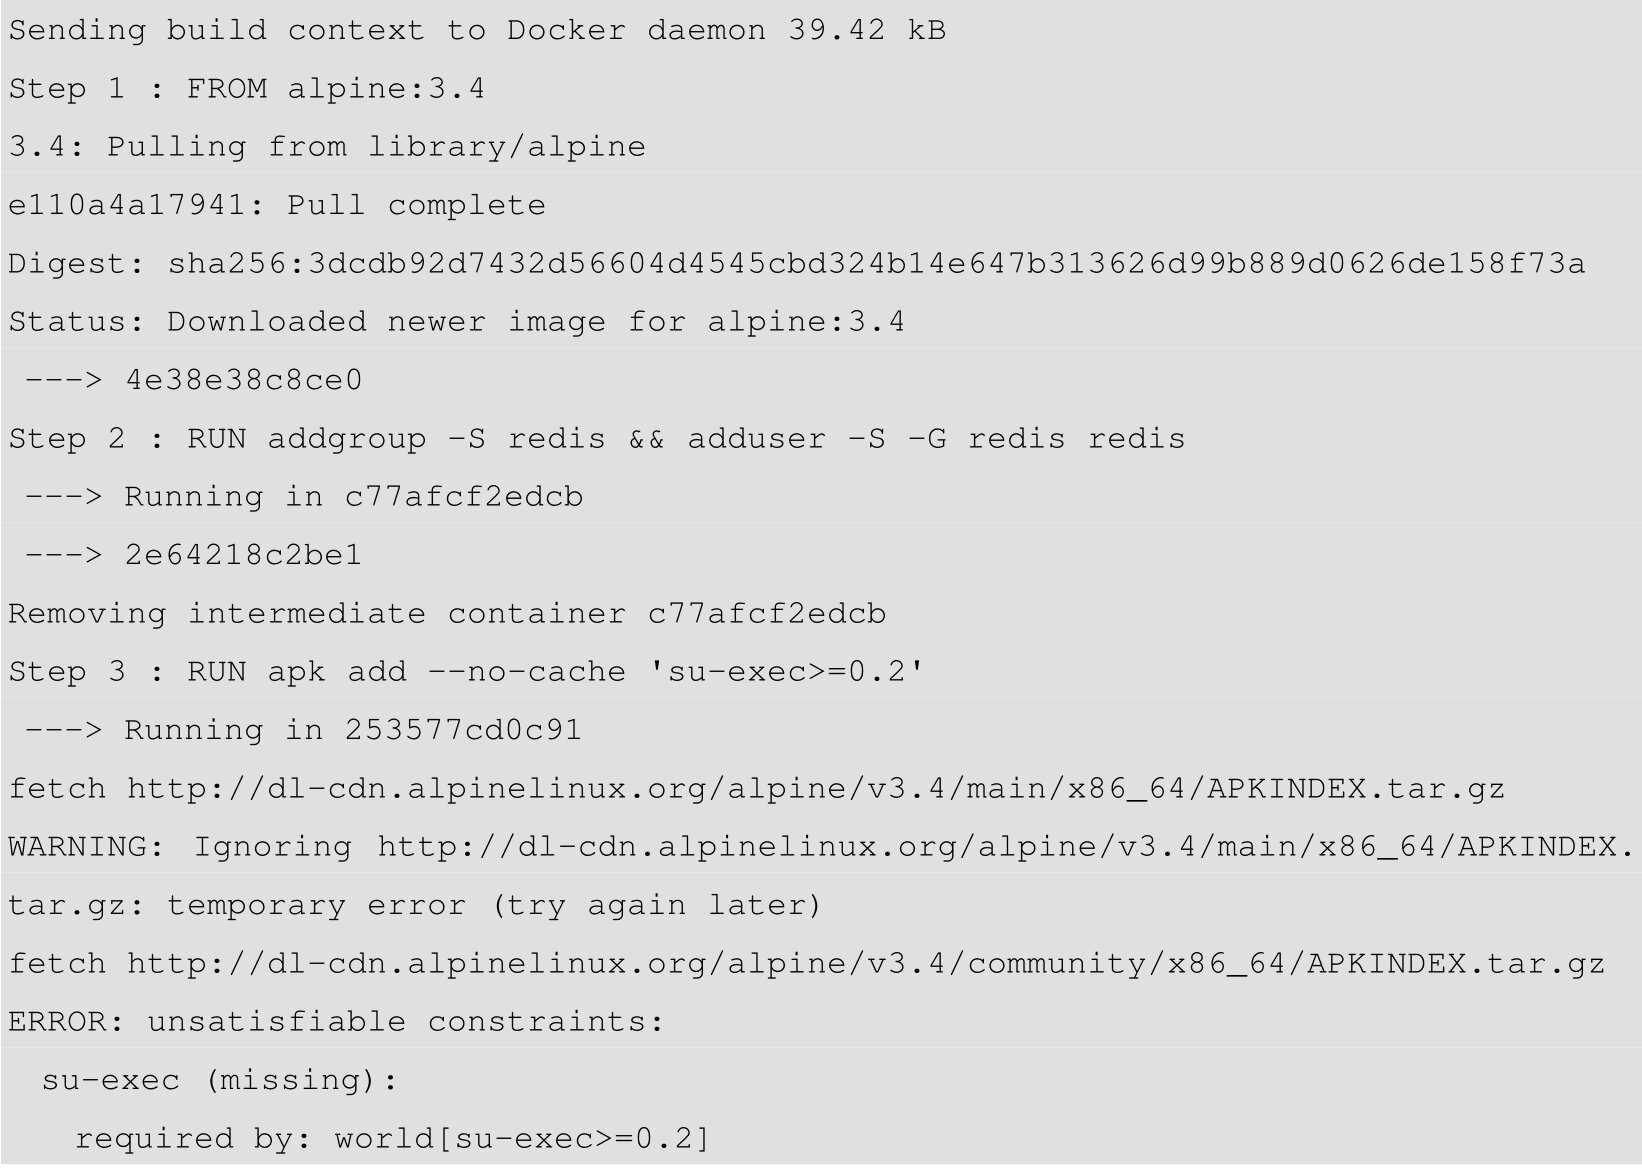

In [7]:
#对应图片images/txt006_7.jpg；想要获取 mycode 奖励，请勿删除此行注释。
Sending build context to Docker daemon 39.42 kB
Step 1 : FROM alpine:3.4
3.4: Pulling from library/alpine
e110a4a17941: Pull complete
Digest: sha256:3dcdb92d7432d56604d4545cbd324b14e647b313626d99b889d0626del58f£73a
Status: Downloaded newer image for alpine:3.4
—--> 4e38e38c8ce0
Step 2 : RUN addgroup -S redis && adduser -S -G redis redis
---> Running in c77afcf2edcb
—--> 2e64218c2bel
Removing intermediate container c7/7afcf2edcb
Step 3 : RUN apk add --no-cache 'su-exec>=0.2'
---> Rutining in, 253577cd0coL
fetch http://dl—cdn.alpinelinux.org/alpine/v3.4/main/x86_64/APKINDEX.tar.gz
WARNING: Ignoring http://dl-cdn.alpinelinux.org/alpine/v3.4/main/x86_64/APKINDEX.
tar.gz: temporary error (try again later)
fetch http://dl-cdn.alpinelinux.org/alpine/v3.4/community/x86_64/APKINDEX.tar.gz
ERROR: unsatisiiable constraints:
su-exec (missing):

required by: world[su-exec>=0.2]

SyntaxError: invalid syntax (<ipython-input-7-aa07e5e22cd8>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_7.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

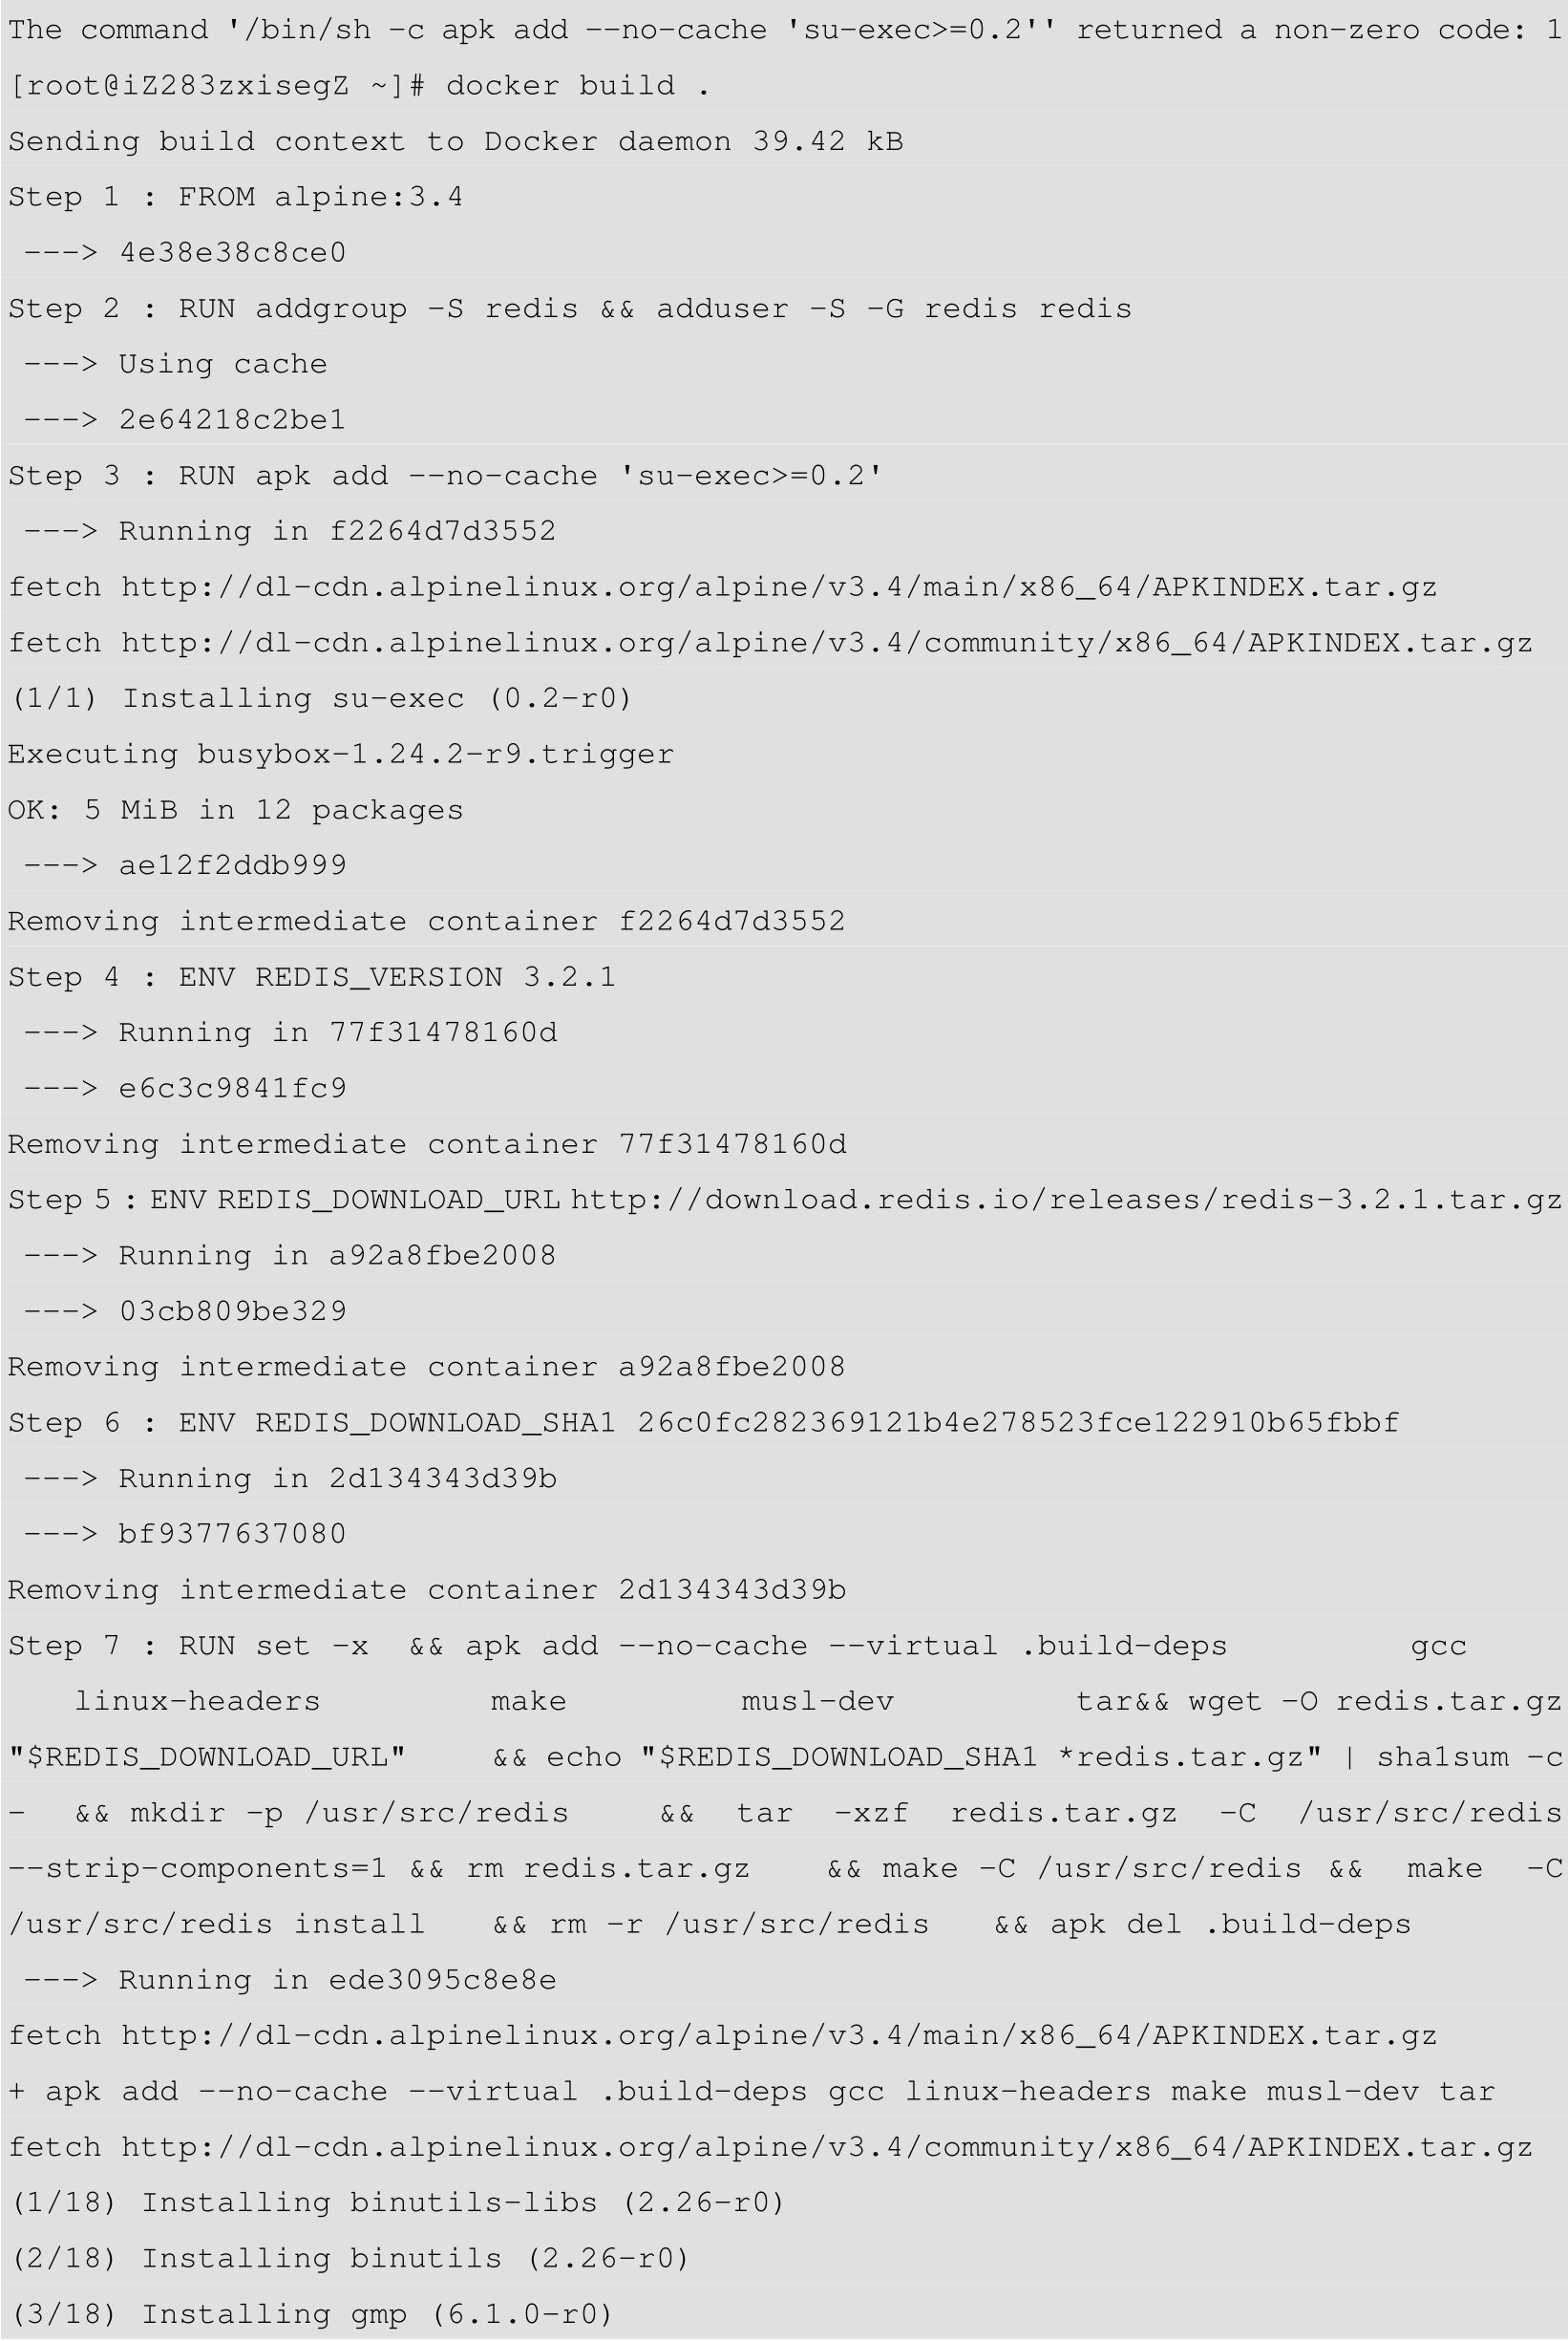

In [8]:
#对应图片images/txt006_8.jpg；想要获取 mycode 奖励，请勿删除此行注释。
The command '/bin/sh -c apk add --no-cache 'su-exec>=0.2'' returned a non-zero code: 1
[root0iZ283zxisegZ ~]# docker build

Sending build context to Docker daemon 39.42 kB

Step 1 : FROM alpine:3.4

===> AS30E56C8CE0

Step 2 : RUN addgroup -S redis && adduser -S -G redis redis

-—--> Using cache

—--> 2e€64218c2bel

Step 3 : RUN apk add --no-cache 'su-exec>=0.2'

---> Running in £2264d7d3552

fetch http://dl—cdn.alpinelinux.org/alpine/v3.4/main/x86_64/APKINDEX.tar.gz
fetch http://dl-cdn.alpinelinux.org/alpine/v3.4/community/x86_64/APKINDEX.tar.gz
(1/1) Installing su-exec (0.2-r0)

Executing busybox-1.24.2-r19 trigger

OK: 5 MiB in 12 packages

—--> ael2f2ddb999

Removing intermediate container £2264d7d3552

Step 4 : ENV REDIS_VERSION 3.2.1

---> Running in 77f£31478160d

===> e6c3c2e41ic?

Removing intermediate container 77£31478160d

Step 5 : ENV REDIS_DOWNLOAD_URL http://download.redis.io/releases/redis-3.2.1.tar.gz
---> Running in a92a8fbe2008

—--> 03cb809be329
Removing intermediate container a92a8fbe2008

Step 6 : ENV REDIS_DOWNLOAD_SHA1 26c0£c282369121b4e278523fce122910b65fbbf

-—--> Running in 2d134343d39b

seae b£9377637080

Removing intermediate container 2d134343d39b

Step 7 : RUN set -x && apk add --no-cache --virtual .build-deps Gece
linux—-headers make musl—dev taré&& wget -O redis.tar.gz
"SREDIS_DOWNLOAD_URL" && echo "SREDIS_DOWNLOAD_SHA1 *redis.tar.gz" | shalsum -c
- && mkdir -p /usr/src/redis && tar -xzf redis.tar.gz -C /usr/src/redis
-—-strip-components=1 && rm redis.tar.gz && make -C /usr/src/redis && make -C
/usr/src/redis install && rm -r /usr/src/redis && apk del .build-deps

---> Running in ede3095c8e8e

fetch http://dl-cdn.alpinelinux.org/alpine/v3.4/main/x86_64/APKINDEX.tar.gz

+ apk add --no-cache --virtual .build-deps gcc linux-headers make musl-dev tar
fetch http://dl-cdn.alpinelinux.org/alpine/v3.4/community/x86_64/APKINDEX.tar.gz
(1/18) Installing binutils-libs (2.26-r0)

(2/18) Installing binutils (2.26-r0)

(3/18) Installing gmp (6.1.0-r0)

SyntaxError: invalid syntax (<ipython-input-8-0d310fe172e1>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_8.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

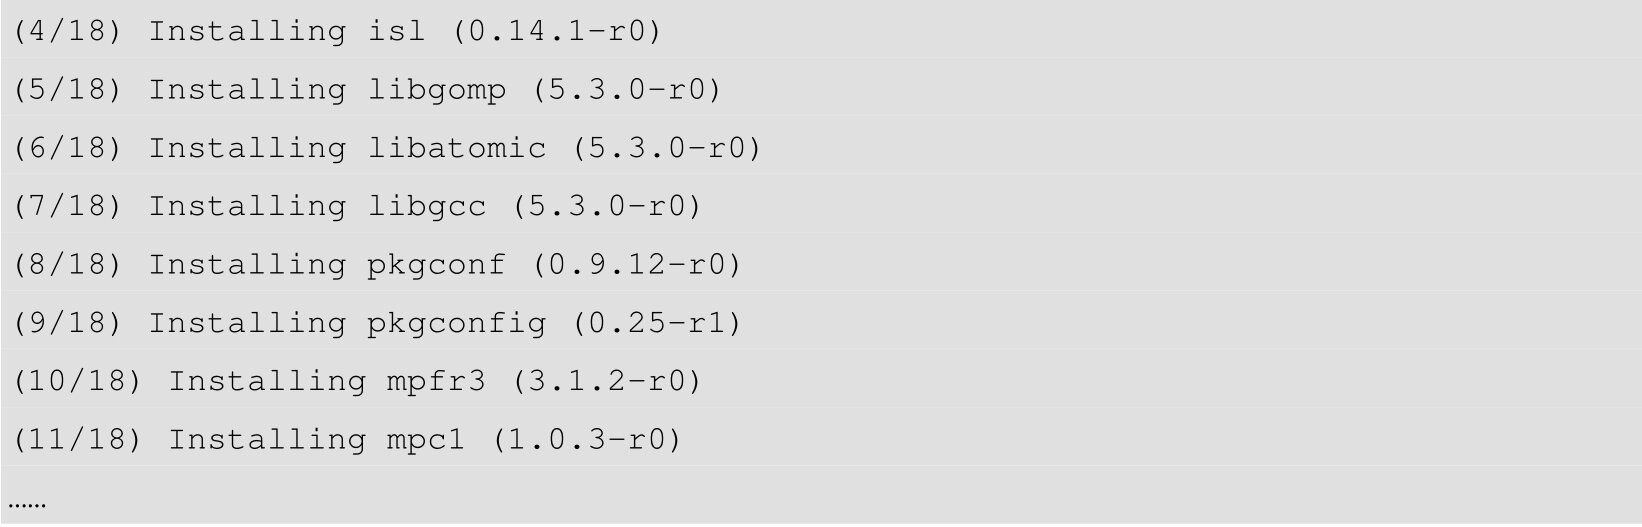

In [9]:
#对应图片images/txt006_9.jpg；想要获取 mycode 奖励，请勿删除此行注释。
(4/18) Installing isl (0.14.1—r0)
(5/18) Installing libgomp (5.3.0-r0)
(6/18) Installing libatomic (5.3.0-r0)
(7/18) Installing libgee (5.3.0-r0)
(8/18) Installing pkgconf (0.9.12-r0)
(9/18) Installing pkgconfig (0.25-r1)
(10/18) Installing mpfr3 (3.1.2-r0)
(i718 Weinstalling mpc 11.0. 3-10)

SyntaxError: invalid syntax (<ipython-input-9-c12682772137>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_9.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

Docker根据Dockerfile建立镜像的每一步操作都会生成一层镜像。在建立每层镜像的时候，Docker都会先查找本地的镜像库中是否含有需要构建的镜像，如果有，就会直接采用这个镜像，可以从构建过程的输出中看到 ————> Using cache的字样，表示构建此镜像层时采用了本地已有的镜像。逐个对操作生成单独的镜像层，实现了拆分镜像和对镜像层高效利用的效果。

因为通过Dockerfile建立镜像的过程，是按每个操作来生成镜像层的，所以如果想减少镜像层的数量，可以通过&&或sh文件合并一些构建过程中的操作，让这些操作只生成一个镜像层。

另外，构建镜像时需要指定镜像的名称及标签，我们可以通过在docker builder命令后携带-t或--tag参数来指定被构建镜像的名称及标签信息：

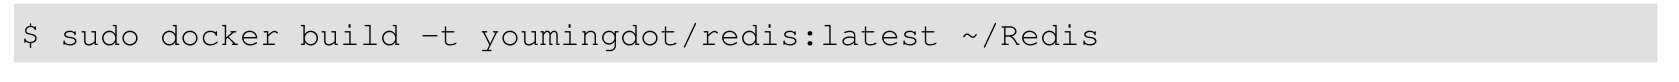


In [10]:
#对应图片images/txt006_10.jpg；想要获取 mycode 奖励，请勿删除此行注释。
S sudo docker build -t youmingdot/redis:latest ~/Redis

SyntaxError: invalid syntax (<ipython-input-10-1dd26591e6a2>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_10.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

构建操作完成后，我们就能在本地的镜像中找到刚刚构建的镜像了：

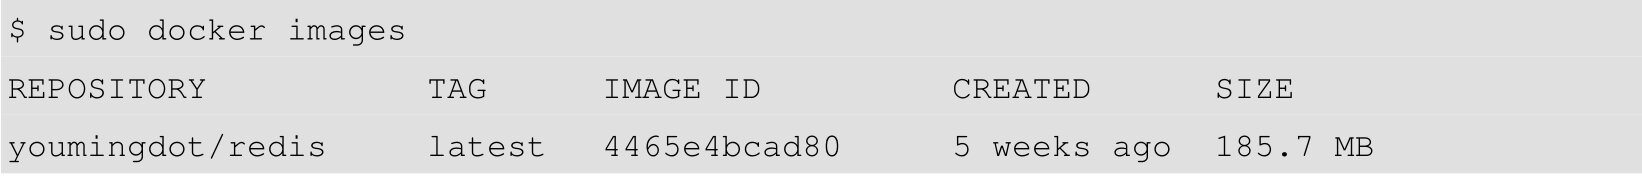

In [11]:
#对应图片images/txt006_11.jpg；想要获取 mycode 奖励，请勿删除此行注释。
S$ sudo docker images
REPOSITORY TAG IMAGE ID CREATED SIZE
youmingdot/redis latest 4465e4bcad80 5 weeks ago 185.7 MB

SyntaxError: invalid syntax (<ipython-input-11-32102c41118a>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_11.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

## 5.2 基础指令

基础指令是控制或表述Dockerfile整体性质的指令，能够为我们选择基础镜像，也能提供镜像的基本信息。

### 5.2.1 FROM

Docker的镜像都是在bootfs层上实现的，但是我们不必每次构建镜像都从bootfs层开始，我们可以直接在其他已经搭建好的颈项上进行修改，FROM指令就是用来指定我们所要构建的镜像是基于哪个镜像建立的。

作为Dockerfile必不可少的最基础的指令，FROM指令必须作为第一条指令，也就是说，它应该出现在除注释以外的第一行里。不过，在一个Dockerfile中是允许出现多个FROM指令的，以每个FROM指令为界限，都会生成不同的镜像，但是我们还是推荐将生成不同镜像的命令拆分到不同的Dockerfile中。

FROM 指令主要有以下几种使用格式：

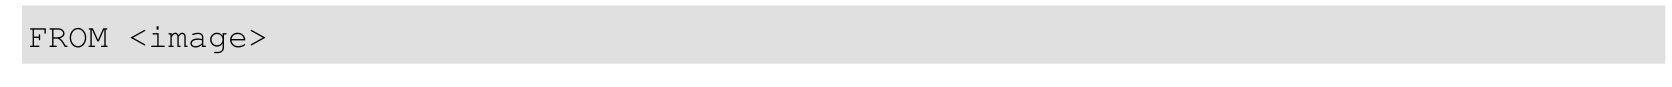

In [12]:
#对应图片images/txt006_12.jpg；想要获取 mycode 奖励，请勿删除此行注释。

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_12.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

或：

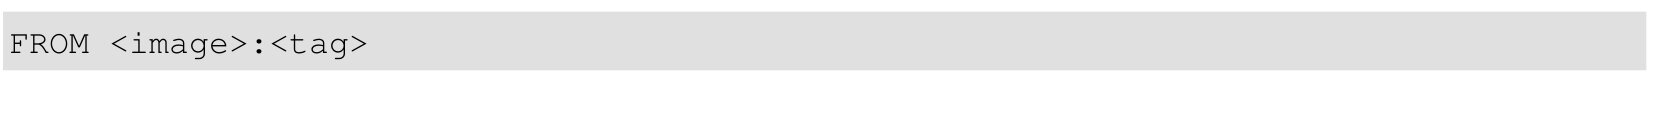

In [13]:
#对应图片images/txt006_13.jpg；想要获取 mycode 奖励，请勿删除此行注释。

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_13.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

或：

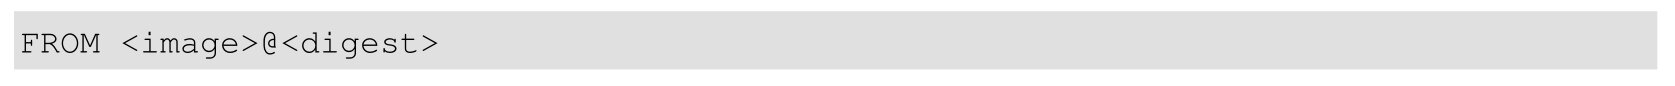

In [14]:
#对应图片images/txt006_14.jpg；想要获取 mycode 奖励，请勿删除此行注释。
FROM <image>0<digest>

SyntaxError: invalid syntax (<ipython-input-14-f542d7c25c3f>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_14.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

使用FROM指令时，<tag>和<digest>都是可选的，当不指定这两项时，Docker会像docker pull命令一样选择latest这个tag的镜像作为基础镜像。

### 5.2.2 MAINTAINER

MAINTAINER 指令的用处是提供镜像的作者信息，其使用格式为：

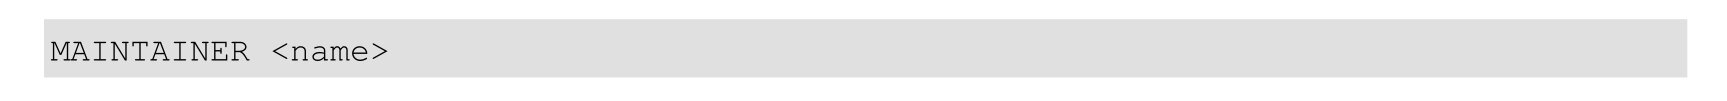

In [15]:
#对应图片images/txt006_15.jpg；想要获取 mycode 奖励，请勿删除此行注释。

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_15.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

## 5.3 控制指令

控制指令是Dockerfile的核心部分，我们通过控制指令来描述整个镜像的构建过程。

### 5.3.1 RUN

在构建镜像的过程中，我们需要在基础镜像中做很多操作，RUN指令就是用来给定这些需要被执行的操作的。由于在构建过程中进行各项操作是不可或缺的过程，可以说RUN指令是Dockerfile中最常用的指令，甚至没有之一。

RUN指令有两种使用格式：

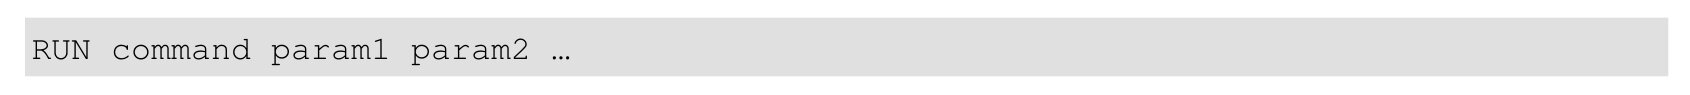

In [16]:
#对应图片images/txt006_16.jpg；想要获取 mycode 奖励，请勿删除此行注释。
RUN command paraml param2

SyntaxError: unexpected EOF while parsing (<ipython-input-16-72c160ed8bee>, line 10)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_16.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

或：

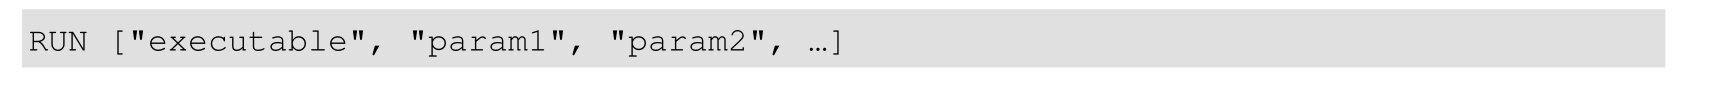

In [17]:
#对应图片images/txt006_17.jpg；想要获取 mycode 奖励，请勿删除此行注释。
RUN

["executable",

"paraml",

"param2",

ssl

SyntaxError: unexpected EOF while parsing (<ipython-input-17-72c160ed8bee>, line 10)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_17.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

这两种使用格式代表的意义不同，适用的场景也有区别。

如果以RUN command param1 param2……这种形式来设置RUN指令，在构建镜像时，实际是以Shell程序来执行操作。例如，我们定义RUN mkdir data，实际执行的回事/bin/sh -c mkdir data。默认情况下，Docker会选择使用 /bin/sh作为Shell程序，我们可以使用SHELL指令切换默认的Shell程序。大家可能会觉得使用RUN command param1 param2……这种形式来执行命令，有种隔靴搔痒的感觉，执行的命令还要在Shell程序中中转一下，但其有一个非常大的优势：支持书写换行。有时指令会比较冗长，如果写在一行中极不方便阅读和排查错误，在Shell程序中我们可以使用“\”对命令进行拆行，例如：

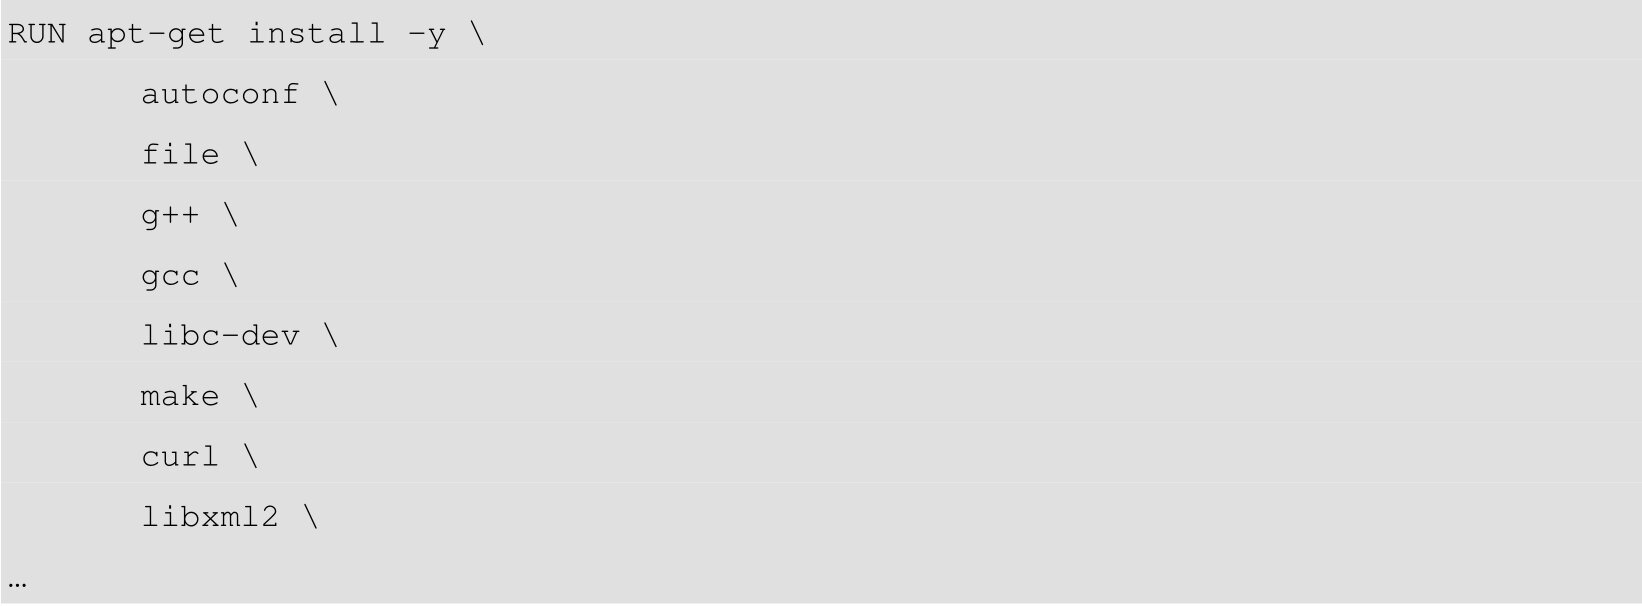

In [18]:
#对应图片images/txt006_18.jpg；想要获取 mycode 奖励，请勿删除此行注释。
RUN apt-get install -y \
autoconf \
file \
gt+ \
gee
libc-dev \
make \
curl \

libxml2 \

SyntaxError: invalid syntax (<ipython-input-18-20c0fd49a622>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_18.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

使用换行连接的方式进行书写可以让命令更清晰。

RUN ["executable", "param1", "param2", ...]这种形式，是将命令及全部参数逐个传入到方括号中，命令及参数都使用双引号进行引用。使用这种方式来执行命令，可以有效规避在某些基础镜像中没有Shell程序，或者用于需要临时切换Shell程序的时候：

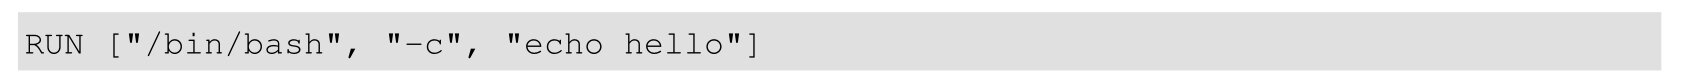



In [19]:
#对应图片images/txt006_19.jpg；想要获取 mycode 奖励，请勿删除此行注释。
RUN ["/bin/bash", "-ce", "echo hello")

SyntaxError: invalid syntax (<ipython-input-19-f06ba4a4e0fe>, line 2)

限时 mycode 任务：编程是一项注重实战的技能，立即尝试敲写代码，让自己熟能生巧。上方代码块中的文本是否和图片显示一致？欢迎您立即改写/修正并尝试运行。点击“存到 MyCode”，还有机会拿到学习时长 1-30u 的奖励。

图片：images/txt006_19.jpg；贡献者：虚位以待；最近更新：2020-08-31 20:00

Docker会在一个新的镜像层中执行我们给出的命令，并且在执行完成后提交镜像层，用作Dockerfile中下一个指令执行的基础。正式因为Docker使用了镜像分层设计，才使得镜像的提交变得非常“廉价”，即使每次执行RUN指令都创建一个新的镜像层，也不会对镜像的体积、性能等造成巨大的影响。

需要注意的是，在使用RUN指令时，Docker判断是否采用缓存构建的依据是给出的指令是否与生成缓存使用的指令一致，也就是说，若本次执行的结果与缓存中不一致，也会采用缓存中的数据而不再执行命令。在某些场合下并不是我们想要的结果，比如使用RUN apt-get update时都希望使用最新结果，这时可以使用docker build命令加--no-cache参数的方式解决这个问题。